In [54]:
import collections
from collections import OrderedDict
from matplotlib import pyplot as plt
from matplotlib import cm
import pylab
import math
from operator import add
from scipy.stats import pearsonr
import os
os.chdir('../')
os.chdir(os.getcwd()+'/data')

In [2]:
class CGR():
    K = 0
    c = None
    h = ""
    Data = ""
    def read_fasta(self,loc):
        f = open(loc)
        s1 = f.read()
        data = "".join(s1.split("\n")[1:])
        head = "".join(s1.split("\n")[0:1])
        return data,head
    
    def count_kmers(self,sequence, k):
        d = collections.defaultdict(int)
        for i in range(len(self.Data)-(k-1)):
            d[sequence[i:i+k]] +=1
        d.pop("N",None)
        return d

    def probabilities(self,kmer_count, k):
        probabilities = collections.defaultdict(float)
        N = len(self.Data)
        for key, value in kmer_count.items():
            probabilities[key] = float(value) / (N - k + 1)
        return probabilities

    def chaos_game_representation(self,probabilities, k):
        array_size = int(math.sqrt(4**k))
        chaos = []
        for i in range(array_size):
            chaos.append([0]*array_size)
        maxx = array_size
        maxy = array_size
        posx = 1
        posy = 1
        for key, value in probabilities.items():
            for char in key:
                if char == "T":
                    posx +=  maxx/2
                elif char == "C":
                    posy += maxy/2
                elif char == "G":
                    posx += maxx/2
                    posy += maxy/2
                maxx /= 2
                maxy /= 2

            chaos[int(posy-1)][int(posx-1)] = value
            maxx = array_size
            maxy = array_size
            posx = 1
            posy = 1
        return chaos

    def load_fasta(self,loc,k):
        data,head = self.read_fasta(loc)
        self.Data = data
        f4 = self.count_kmers(data, k)
        f4_prob = self.probabilities(f4, k)
        chaos_k4 = self.chaos_game_representation(f4_prob, k)
        self.c = chaos_k4
        self.h = head
        return chaos_k4
    
    def show(self):
        pylab.figure(figsize=(12,12))
        pylab.title('CGR of '+str(self.K)+'-mers for '+self.h[2:])
        pylab.imshow(self.c, cmap=cm.gray_r)
        pylab.show()

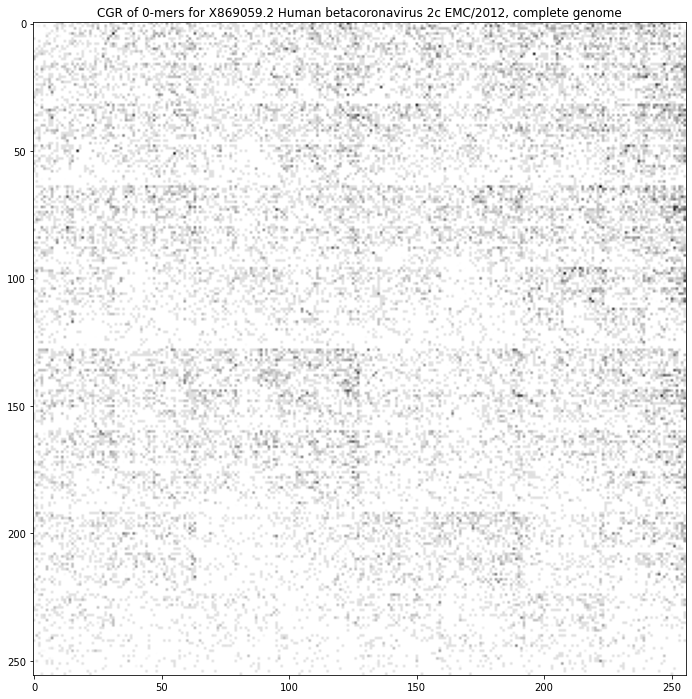

In [3]:
A = CGR()
cg = A.load_fasta("genomic.fasta",8)
A.show()

In [3]:
B = CGR()
cg = B.load_fasta("seq_1.fasta",7)
C = CGR()
cg_1 = C.load_fasta("seq_2.fasta",7)

In [ ]:
B.show()

In [ ]:
C.show()

In [ ]:
a = max(cg[0])
b = max(cg[1])
CG = list(map(lambda x,y:((x*(1/a))+(y*(1/b))*10)**0.5, cg[0],cg[1]))
a = max(cg_1[0])
b = max(cg_1[1])
CG_1 = list(map(lambda x,y:((x*(1/a))+(y*(1/b))*10)**0.5, cg_1[0],cg_1[1]))

In [17]:
from scipy.stats import spearmanr
corr, _ = spearmanr(CG,CG_1)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.998


In [ ]:
f = open("seq_1.fasta")
s1 = f.read()
data_1 = "".join(s1.split("\n")[1:])
f = open("seq_2.fasta")
s1 = f.read()
data_2 = "".join(s1.split("\n")[1:])

In [ ]:
sum=0
for i in range(len(data_2)):
    if data_1[i]==data_2[i]:
        sum+=1
sum/=len(data_1)
print(sum)

In [5]:
import numpy as np

In [ ]:
t

<Figure size 864x864 with 0 Axes>

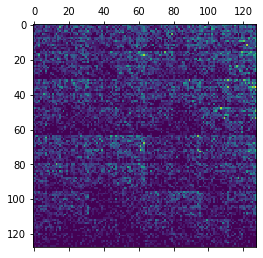

In [15]:
plt.figure(figsize=(12,12))
t = np.array(cg)
t_1 = np.array(cg_1)
plt.matshow(t)
plt.show()

In [8]:
t.shape

(128, 128)

In [18]:
CG = np.sum(t**(1/3), axis=0)
CG_1 = np.sum(t_1**(1/3), axis=0)

In [24]:
a = np.array([[1,2,3],[1,2,3]])
b = np.array([1,2])

In [28]:
a * b.reshape(-1, 1)

array([[1, 2, 3],
       [2, 4, 6]])

In [80]:
def Vec(a):
    return [int(np.sum(a[i]/np.std(a[i]**(1/3)))) for i in range(a.shape[0])]
def VecSub(a,b):
    return [a_i - b_i for a_i, b_i in zip(Vec(a), Vec(b))]

In [84]:
np.sum(VecSub(t,t_1))

-1

In [64]:
corr, _ = pearsonr(Vec(t),Vec(t_1))

In [79]:
corr

0.9987601648806345